# Iris Flower

KNN (K Vizinhos mais próximos)
    
    Considera a proximidade entre dados

In [87]:
#Carregando bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Carregando dados
df = pd.read_csv('iris.csv')

In [4]:
#Exibindo colunas
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [21]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [113]:
print('Existem:\n\n' + str(df.shape[0]) + ' observações')
print(str(df.shape[1]) + ' features\n')
print('Com as seguintes labels:')

#Contar quantas labels
from collections import Counter
print(*Counter(df.Name), sep=', ')

Existem:

150 observações
5 features

Com as seguintes labels:
Iris-setosa, Iris-virginica, Iris-versicolor


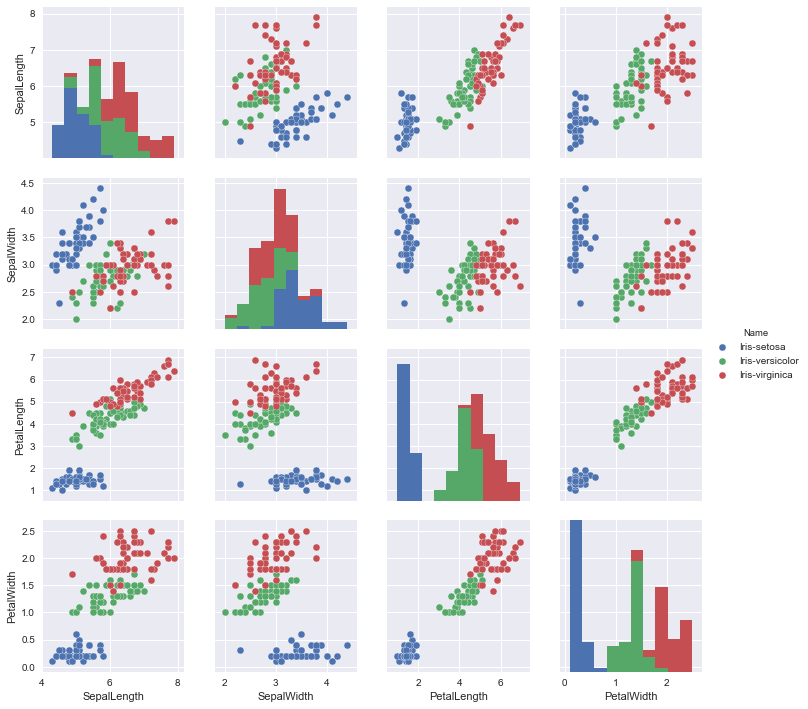

In [7]:
#Plotar com variancia de cor com base na classe Name
sb.pairplot(df, hue='Name')

In [34]:
#selecionando as features para classificação num array numpy
x = np.array(df.drop('Name',1))

#selecionando as classes para classificação num array numpy
y = np.array(df.Name)

In [35]:
# importando KNN
from sklearn.neighbors import KNeighborsClassifier

#criando classificador
knn = KNeighborsClassifier(n_neighbors=3)

#treinando classificador
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# MAGIC

In [68]:
knn.predict([[6.5,6.5,4.7,1.3]])

array(['Iris-versicolor'], dtype=object)

In [27]:
knn.predict([[4.2,3.1,2.1,0.9]])

array(['Iris-setosa'], dtype=object)

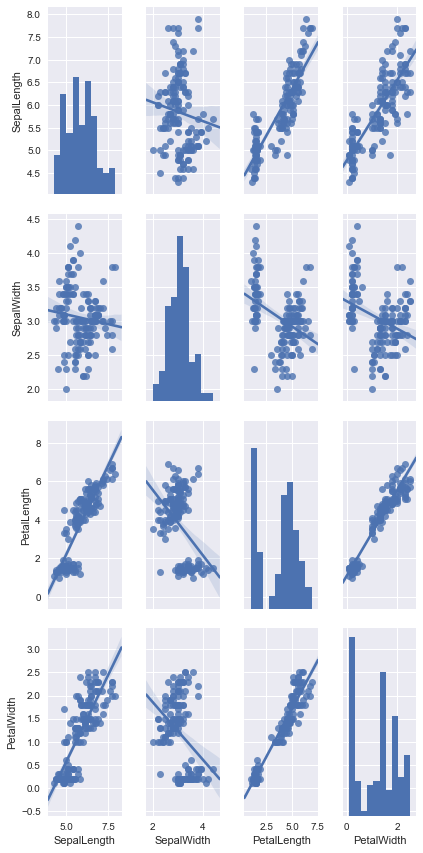

In [32]:
sb.pairplot(df, size=3, aspect=0.5, kind='reg')

# Facilitando

In [83]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# função KNN
def KNN(_val,_xtrain,_xtest,_ytrain, _ytest):
    knn = KNeighborsClassifier(n_neighbors=_val)
    knn.fit(_xtrain, _ytrain)
    y_pred = knn.predict(_xtest)
    print(metrics.accuracy_score(_ytest, y_pred))
    return

In [84]:
KNN(3, x, x, y, y)

0.96


In [85]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# função LogReg
def LogReg(_xtrain,_xtest,_ytrain, _ytest):
    logreg = LogisticRegression()
    logreg.fit(_xtrain, _ytrain)
    y_pred = logreg.predict(_xtest)
    print(metrics.accuracy_score(_ytest, y_pred))
    return

LogReg(x,x,y,y)

0.96


In [90]:
KNN(1,x,x,y,y)
KNN(5,x,x,y,y)
LogReg(x,x,y,y)

1.0
0.966666666667
0.96


In [95]:
# Gerar treino e teste aleatório
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

KNN(1, x_train,x_test,y_train,y_test)
KNN(5, x_train,x_test,y_train,y_test)
LogReg(x_train,x_test,y_train,y_test)

0.95
0.966666666667
0.95
